In [1]:
## K - Nearest Neighbour - 07/12/18 
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Loading Dataset
df = pd.read_csv('./cancer.csv', header= -1)
cols = ['Id', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Brand Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'] 
df.columns = cols

pd.DataFrame(df)

,Id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Brand Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Id                             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Brand Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


Id                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Brand Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
df.describe()

,Id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Brand Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
df.shape

(699, 11)

In [7]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [8]:
# Data cleaning/ pre-processing
df[ df['Bare Nuclei'] == '?']

,Id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Brand Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [9]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [10]:
df['Bare Nuclei'].replace('?',np.NAN, inplace= True)

In [11]:
df.isnull().sum()

Id                              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Brand Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [12]:
# droping rows with null alues using 'dropna' command
df = df.dropna()
df.shape #initial size was 699 x 11

(683, 11)

In [13]:
# Converting class o/p 4 & 2 to coressponding 1 & 0
#df['Class'] = df['Class']/2 -1

In [14]:
df.head(20)

,Id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Brand Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [15]:
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [16]:
# Defining attributes
X = df.drop(['Id','Class'], axis=1)
Y = df['Class']

In [17]:
# Scaling X
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X.values)

/home/shubh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
# Splitting training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8)

/home/shubh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
# Training the predictive model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
# Making Predictions
Y_pred = knn.predict(X_test)

In [21]:
# Accuracy REPORT
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def print_score(clf, X_train, X_test, Y_train, Y_test, train = True):
    if train:
        print("The Training Result:\n")
        print('Accuracy Score:\n{0:4f}\n'.format(accuracy_score(Y_train, clf.predict(X_train))))  
        print('Classification Report:\n{}\n'.format(classification_report(Y_train, clf.predict(X_train)))) 
        print('Confusion matrix:\n{}\n'.format(confusion_matrix(Y_train, clf.predict(X_train))))
    elif train == False:
        print("The Testing Result:\n")
        print('Accuracy Score:\n{0:4f}\n'.format(accuracy_score(Y_test, clf.predict(X_test))))  
        print('Classification Report:\n{}\n'.format(classification_report(Y_test, clf.predict(X_test)))) 
        print('Confusion matrix:\n{}\n'.format(confusion_matrix(Y_test, clf.predict(X_test))))
        

In [22]:
# Accuracy REPORT - Training
print_score(knn, X_train, X_test, Y_train, Y_test, _ )

The Training Result:

Accuracy Score:
0.965201

Classification Report:
             precision    recall  f1-score   support

          2       0.97      0.97      0.97       350
          4       0.95      0.95      0.95       196

avg / total       0.97      0.97      0.97       546


Confusion matrix:
[[340  10]
 [  9 187]]



In [23]:
# Accuracy REPORT - Testing
print_score(knn, X_train, X_test, Y_train, Y_test, False)

The Testing Result:

Accuracy Score:
0.992701

Classification Report:
             precision    recall  f1-score   support

          2       0.99      1.00      0.99        94
          4       1.00      0.98      0.99        43

avg / total       0.99      0.99      0.99       137


Confusion matrix:
[[94  0]
 [ 1 42]]



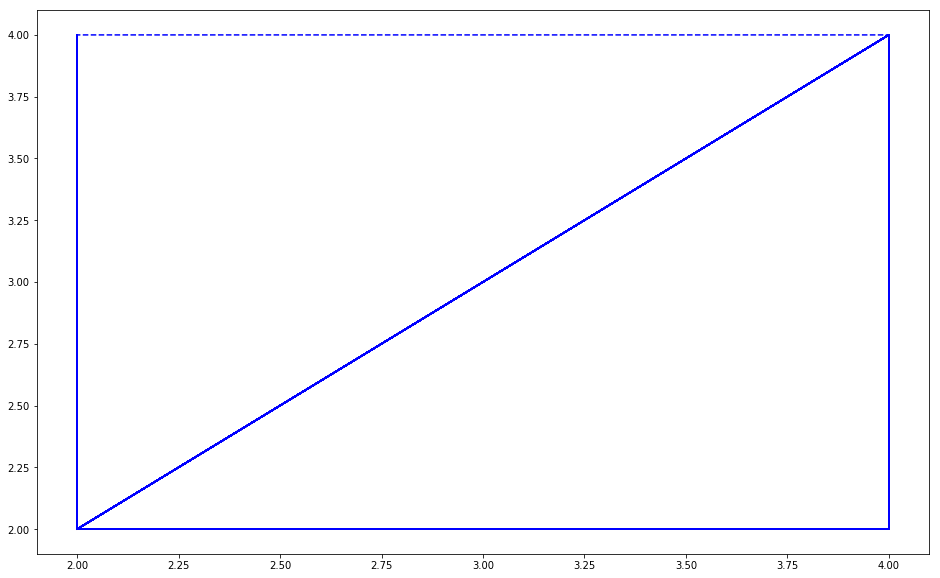

In [24]:
plt.figure(figsize = (16,10))
plt.plot(knn.predict(X_test), Y_test, 'r-', label= 'Test')
plt.plot(knn.predict(X_train), Y_train, 'b--', label= 'Training')